In [10]:
import os,pandas as pd, numpy as np
import scipy.stats as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import savefig

In [11]:
source_dir = os.path.join('..','derivatives','all_data')

In [12]:
data = pd.read_csv(os.path.join(source_dir,'subject_level_data.csv'))
data['Condition'] = data['Condition'].replace({1:'Annotated',2:'Video',3:'Original'})
data['AgeGroup'] = data['AgeGroup'].replace({1:'YA',2:'OA'})
data['Gender'] = data['Gender'].replace({1:'M',2:'F'})
data['nb_CoR'] = data['nb_CoR']*100
data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']] = data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']].replace({np.nan:0})
data

,sub,Condition,Age,Gender,EduYears,SciEdu_HS,SciEdu_UGrad,SciEdu_Grad,AgeGroup,comp_t1,...,TSSI_sum,vocab_sum,SciLit_sum,SciTude_sum,O1_sum,O2_sum,O3_sum,O4_sum,O5_sum,O6_sum
0,101,Annotated,20.0,F,14.0,4,7,0.0,YA,9.0,...,87,30.0,16,38,9.0,14.0,11.0,11.0,10.0,15.0
1,102,Video,19.0,F,12.0,3,3,0.0,YA,10.0,...,83,26.0,16,39,17.0,13.0,14.0,17.0,15.0,13.0
2,103,Original,18.0,M,12.0,3,0,0.0,YA,7.0,...,76,28.0,15,47,16.0,13.0,12.0,16.0,9.0,12.0
3,104,Annotated,18.0,M,12.0,4,0,0.0,YA,9.0,...,97,28.0,16,31,17.0,13.0,12.0,14.0,11.0,11.0
4,105,Video,18.0,M,12.0,6,0,0.0,YA,8.0,...,82,28.0,15,46,17.0,9.0,18.0,14.0,12.0,11.0
5,106,Original,18.0,M,12.0,4,0,0.0,YA,12.0,...,77,26.0,14,38,15.0,17.0,8.0,13.0,10.0,12.0
6,107,Annotated,18.0,F,12.0,4,1,0.0,YA,10.0,...,87,23.0,16,46,20.0,12.0,12.0,13.0,6.0,15.0
7,108,Video,18.0,F,12.0,5,0,0.0,YA,6.0,...,76,22.0,15,45,16.0,13.0,13.0,15.0,14.0,11.0
8,109,Original,18.0,F,13.0,5,2,0.0,YA,9.0,...,95,34.0,16,22,20.0,12.0,12.0,8.0,8.0,12.0
9,110,Annotated,19.0,M,12.0,4,0,0.0,YA,10.0,...,78,28.0,14,38,15.0,13.0,10.0,12.0,7.0,10.0


# Correlations

### Comprehension Change -> everything
#### Pearson r

In [13]:
data = data.dropna()
for c in data.columns:
    try: print(c+'\n',
               'r = %.5f' % sp.pearsonr(data['comp_change'],data[c])[0], '\t',
               'p = %.5f' % sp.pearsonr(data['comp_change'],data[c])[1]
              )
    except TypeError as e: continue

sub
 r = -0.12109 	 p = 0.41229
Age
 r = -0.18245 	 p = 0.21453
EduYears
 r = -0.23114 	 p = 0.11395
SciEdu_Grad
 r = -0.10289 	 p = 0.48648
comp_t1
 r = -0.44036 	 p = 0.00173
comp_t2
 r = 0.59237 	 p = 0.00001
comp_change
 r = 1.00000 	 p = 0.00000
nb_RT
 r = -0.10861 	 p = 0.46245
nb_CoR
 r = -0.01485 	 p = 0.92022
procspd_RT
 r = -0.41377 	 p = 0.00346
NFCS_sum
 r = 0.05603 	 p = 0.70522
TSSI_sum
 r = -0.03264 	 p = 0.82570
vocab_sum
 r = -0.14401 	 p = 0.32881
SciLit_sum
 r = 0.04793 	 p = 0.74632
SciTude_sum
 r = -0.13121 	 p = 0.37403
O1_sum
 r = -0.15302 	 p = 0.29910
O2_sum
 r = 0.28610 	 p = 0.04869
O3_sum
 r = 0.11343 	 p = 0.44271
O4_sum
 r = 0.09878 	 p = 0.50417
O5_sum
 r = -0.08227 	 p = 0.57826
O6_sum
 r = 0.07714 	 p = 0.60228


## Group comparisons

In [14]:
vars_of_interest = ['comp_t1','comp_t2','comp_change','nb_CoR','nb_RT',
                    'procspd_RT','NFCS_sum','TSSI_sum',
                    'vocab_sum','SciLit_sum','SciTude_sum']

In [15]:
grps_of_interest = ['Condition','AgeGroup',['AgeGroup','Condition']]

#### All figures - Bar plots

C:\Users\idalt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


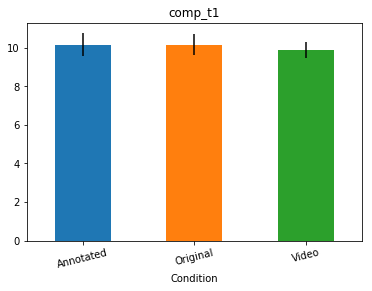

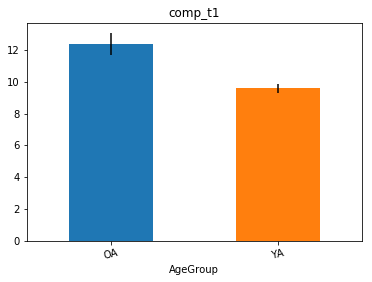

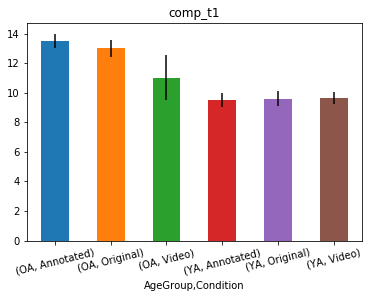

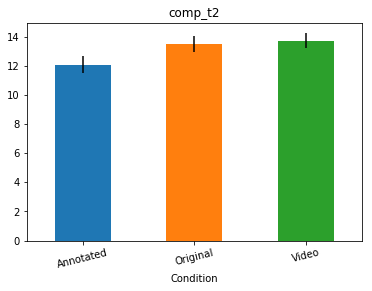

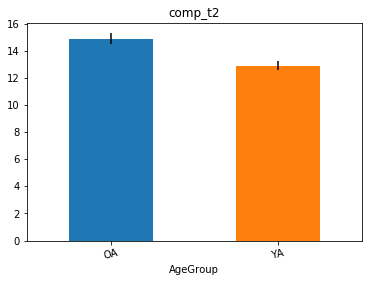

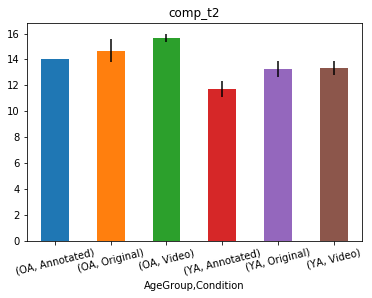

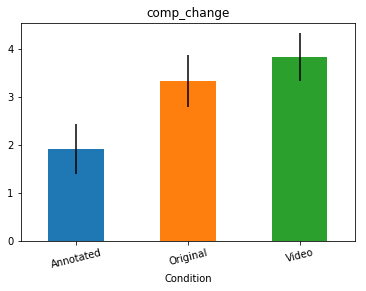

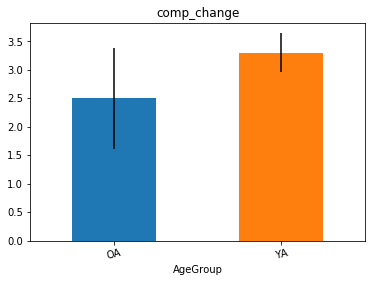

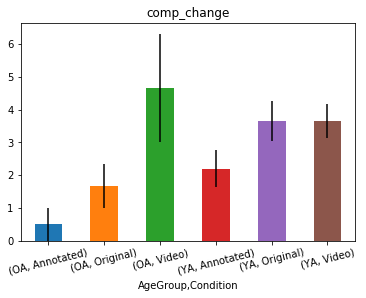

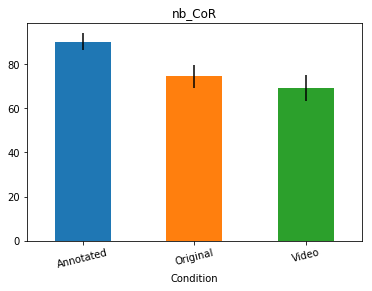

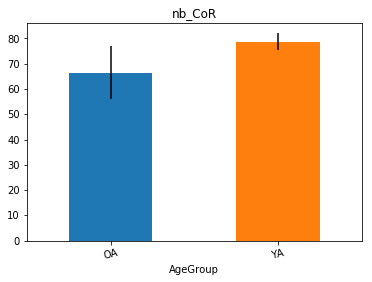

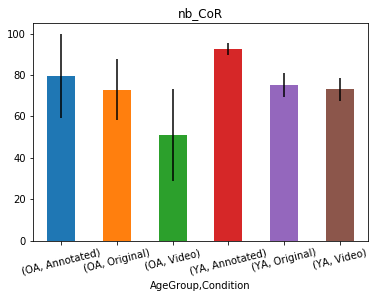

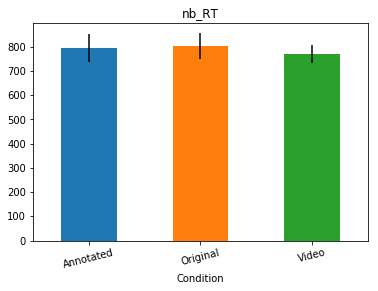

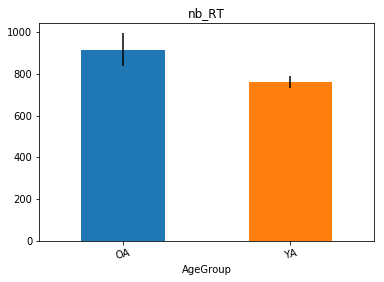

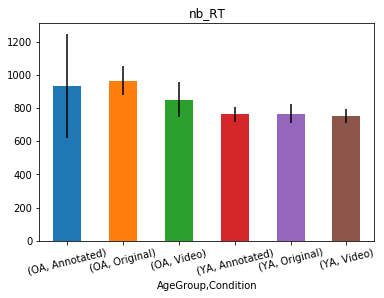

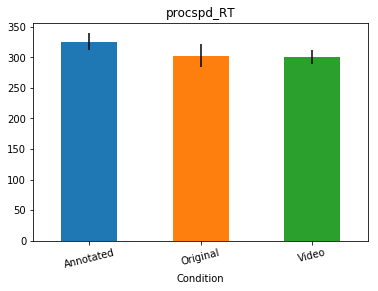

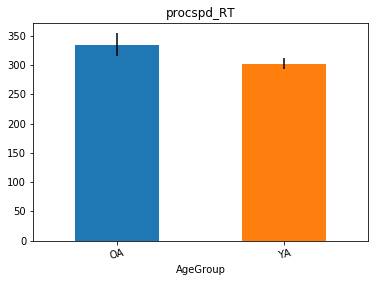

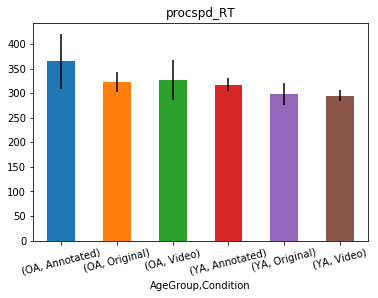

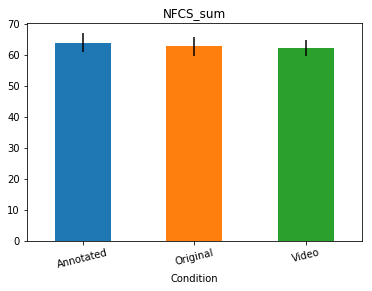

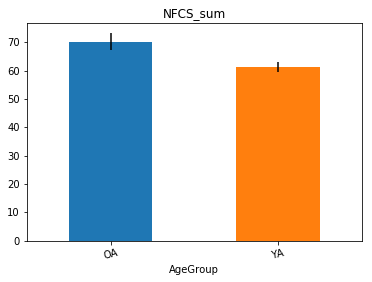

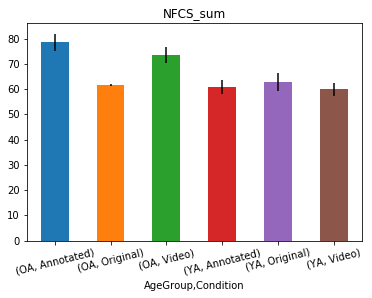

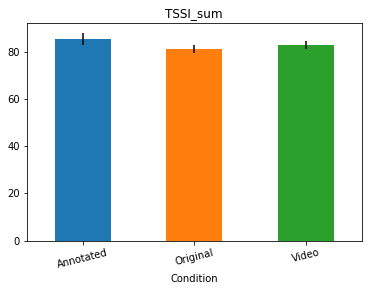

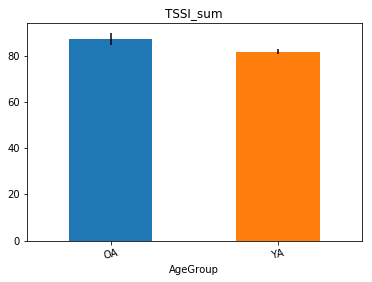

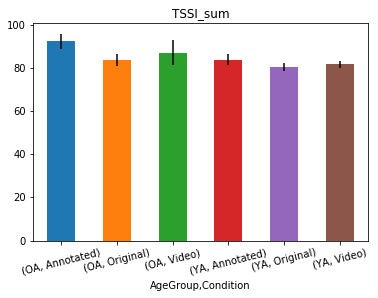

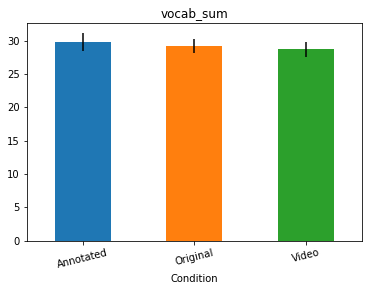

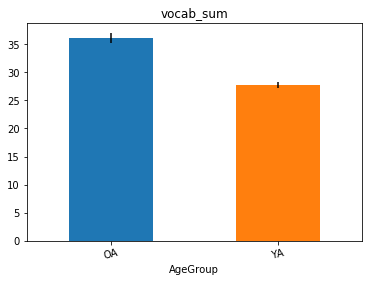

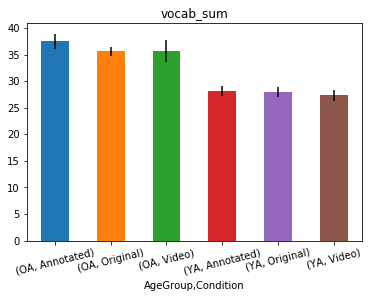

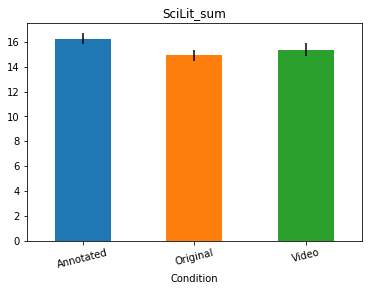

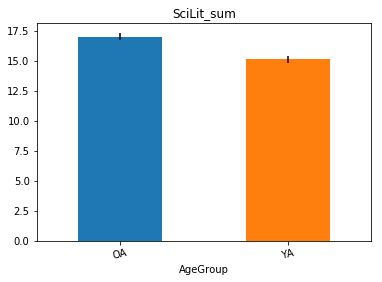

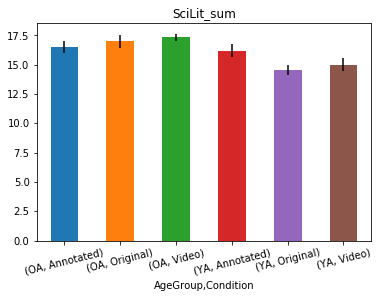

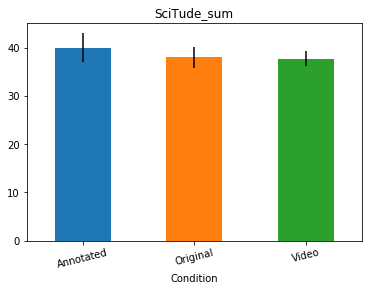

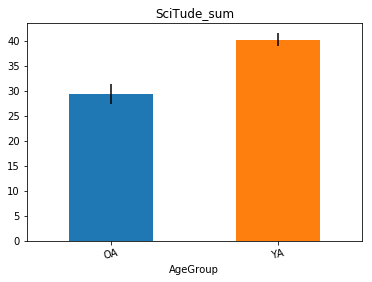

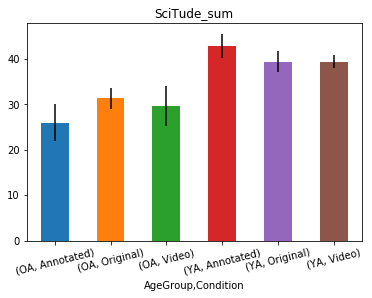

In [8]:
for var in vars_of_interest:
    for grp in grps_of_interest:
        fpath = os.path.join('..','derivatives','figures',var+'_'+''.join(grp)+'.png')
        means = data.groupby(grp).mean()
        sem = data.groupby(grp).sem()
        plot = means.plot.bar(
            y=var,yerr=sem,xticks=np.arange(0,max(data[var]),
                                            step=np.rint(max(data[var])*(1/5))),
            legend=False,title=var,rot=14
        ).get_figure().savefig(fpath)

#### Figures - Swarm plots

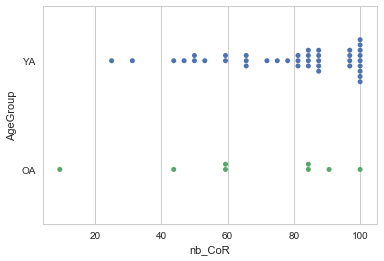

In [79]:
grp = 'AgeGroup'
var = 'nb_CoR'
fpath = os.path.join('..','derivatives','figures',var+'_'+''.join(grp)+'_swarm.png')
sns.set(style='whitegrid')
ax = sns.swarmplot(x=var,y=grp,data=data)
ax.get_figure().savefig(fpath)

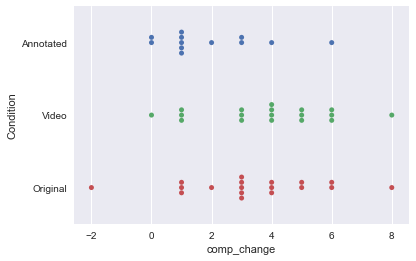

In [35]:
sns.set(style='darkgrid')
grp = 'Condition'
var = 'comp_change'
df = data.set_index(grp)
ax = sns.swarmplot(x=var,y=df.index,data=df)